<a href="https://colab.research.google.com/github/Pietro-Manning/AMD/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from PIL import Image

In [ ]:
BASE_DIR = os.path.join('/kaggle', 'input', 'prado-museum-pictures')

In [ ]:
import os
import pandas as pd


os.environ['KAGGLE_USERNAME'] = "xxxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxxxxx"

DATASET_LINK = "maparla/prado-museum-pictures"


!kaggle datasets download -d {DATASET_LINK}


Dataset URL: https://www.kaggle.com/datasets/maparla/prado-museum-pictures
License(s): MIT
prado-museum-pictures.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o prado-museum-pictures.zip

!ls
import pandas as pd
try:
    df = pd.read_csv('prado.csv')
    print("DataFrame loaded successfully")
except FileNotFoundError:
    print("The file 'prado.csv' was not found. Please check the extracted files.")

Output streaming troncato alle ultime 5000 righe.
  inflating: images/images/a01de9ba-e790-457d-8b08-0312bd49f8ee.jpg  
  inflating: images/images/a0215d66-768d-4b08-9f45-5debe380e3cc.jpg  
  inflating: images/images/a0234db3-6160-47ec-a62f-ae4585b30cfe.jpg  
  inflating: images/images/a02862ca-52ef-4aeb-b1c2-0654954c8426.jpg  
  inflating: images/images/a02a876e-f3fe-40a2-9ea9-8b25a5bda827.jpg  
  inflating: images/images/a0324706-3b2b-49ca-8877-e7e031e5a487.jpg  
  inflating: images/images/a034f244-a906-4d5b-9a13-299648fd4498.jpg  
  inflating: images/images/a034f7c7-f71c-4a52-8f0d-5cd79d2f3c33.jpg  
  inflating: images/images/a036ba7c-f04c-4c4c-892a-36137ba332b7.jpg  
  inflating: images/images/a0416ffb-9003-4580-bcbd-e475c5a5c9fa.jpg  
  inflating: images/images/a04b1ee5-2e98-4d4c-a6a1-82b56b104588.jpg  
  inflating: images/images/a05097fc-491a-4e28-ad2a-8a9659e91e97.jpg  
  inflating: images/images/a052ca98-90f2-402f-8313-1cfdc050025d.jpg  
  inflating: images/images/a060b62e-9653

In [ ]:

import pandas as pd
df = pd.read_csv('prado.csv')

In [ ]:
import pandas as pd
import networkx as nx
df = pd.read_csv('prado.csv')
print(df.columns)

Index(['work_url', 'work_image_url', 'author', 'author_bio', 'author_url',
       'author_id', 'work_title', 'work_subtitle', 'work_exposed',
       'work_description', 'work_tags', 'technical_sheet_numero_de_catalogo',
       'technical_sheet_autor', 'technical_sheet_titulo',
       'technical_sheet_fecha', 'technical_sheet_tecnica',
       'technical_sheet_soporte', 'technical_sheet_dimension',
       'technical_sheet_serie', 'technical_sheet_procedencia', 'bibliography',
       'inventory', 'expositions', 'ubication', 'technical_sheet_autores',
       'technical_sheet_edicion_/_estado', 'technical_sheet_materia',
       'technical_sheet_ceca', 'technical_sheet_autora',
       'technical_sheet_lugar_de_produccion'],
      dtype='object')


In [ ]:
import pandas as pd
df = pd.read_csv('prado.csv')
df = df[['work_url', 'work_image_url', 'work_tags']]

In [ ]:
import networkx as nx
G = nx.Graph()

# Add nodes (pictures)
for work_url in df['work_url']:
    G.add_node(work_url)

# Add edges based on shared tags
tag_to_works = {}

for idx, row in df.iterrows():
    work_url = row['work_url']
    tags = str(row['work_tags']).split(',')
    for tag in tags:
        tag = tag.strip()
        if tag not in tag_to_works:
            tag_to_works[tag] = []
        tag_to_works[tag].append(work_url)

for tag, works in tag_to_works.items():
    for i in range(len(works)):
        for j in range(i + 1, len(works)):
            G.add_edge(works[i], works[j])

In [ ]:
# Number of nodes and edges
num_nodes = len(G.nodes())
num_edges = len(G.edges())
print(f"Number of nodes in the graph: {num_nodes}")
print(f"Number of edges in the graph: {num_edges}")


Number of nodes in the graph: 13487
Number of edges in the graph: 129908


In [ ]:
#node degrees
node_degrees = dict(G.degree())
max_degree_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_degree_node]
print(f"Node with the highest degree: {max_degree_node} with a degree of {max_degree}")

Node with the highest degree: https://www.museodelprado.es/coleccion/obra-de-arte/el-nio-del-arbol/6469ab32-b795-4bc5-96b3-439fab6409e0 with a degree of 264


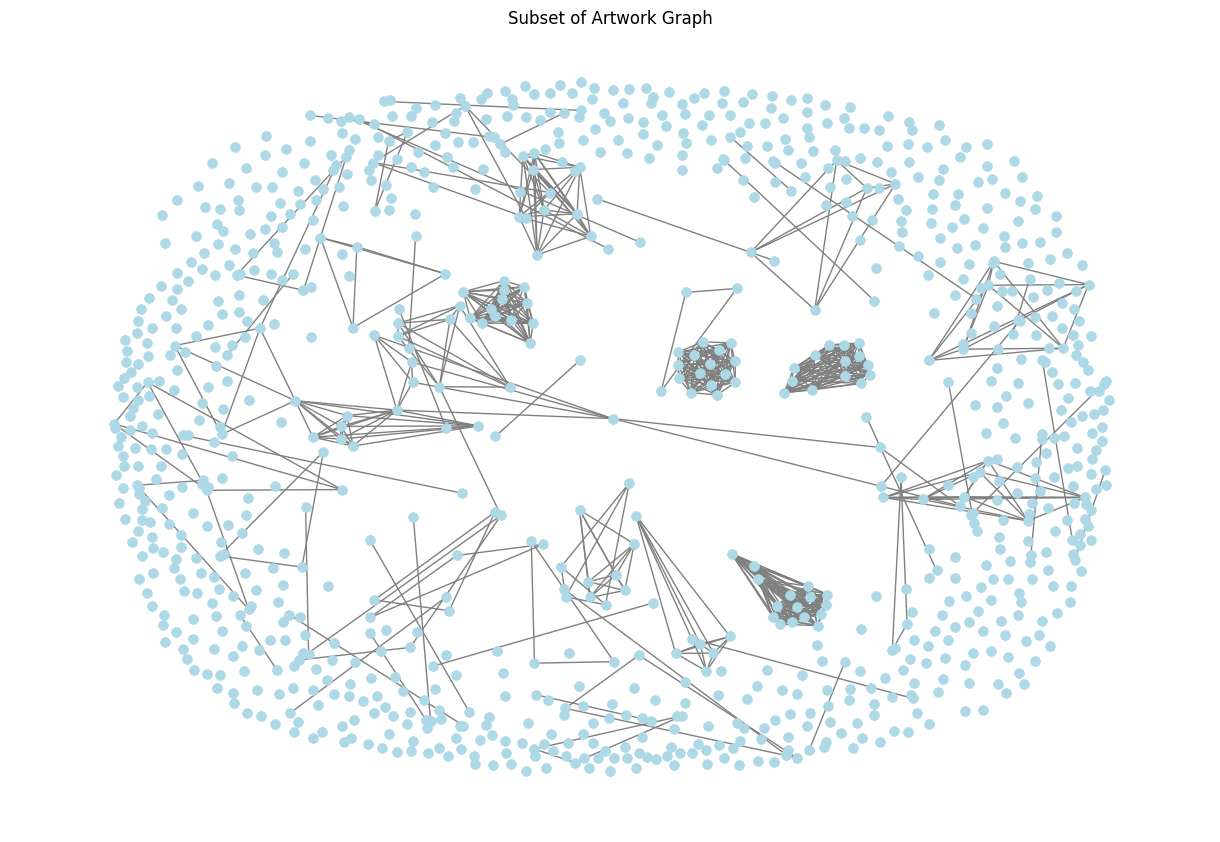

In [ ]:
# a subset of nodes and edges to plot
import random
import matplotlib.pyplot as plt
nodes_list = list(G.nodes())
random_nodes = random.sample(nodes_list, 1000)  # Adjust the number of nodes to plot as needed
subgraph = G.subgraph(random_nodes)

# Plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, k=0.15, iterations=20)  # Adjust parameters for layout if needed
nx.draw(subgraph, pos, with_labels=False, node_color='lightblue', node_size=50, edge_color='gray', linewidths=0.5)
plt.title('Subset of Artwork Graph')
plt.show()

In [ ]:
# Connected components
connected_components = list(nx.connected_components(G))
num_connected_components = len(connected_components)
print(f"Number of connected components in the graph: {num_connected_components}")

Number of connected components in the graph: 8137


KeyboardInterrupt: 

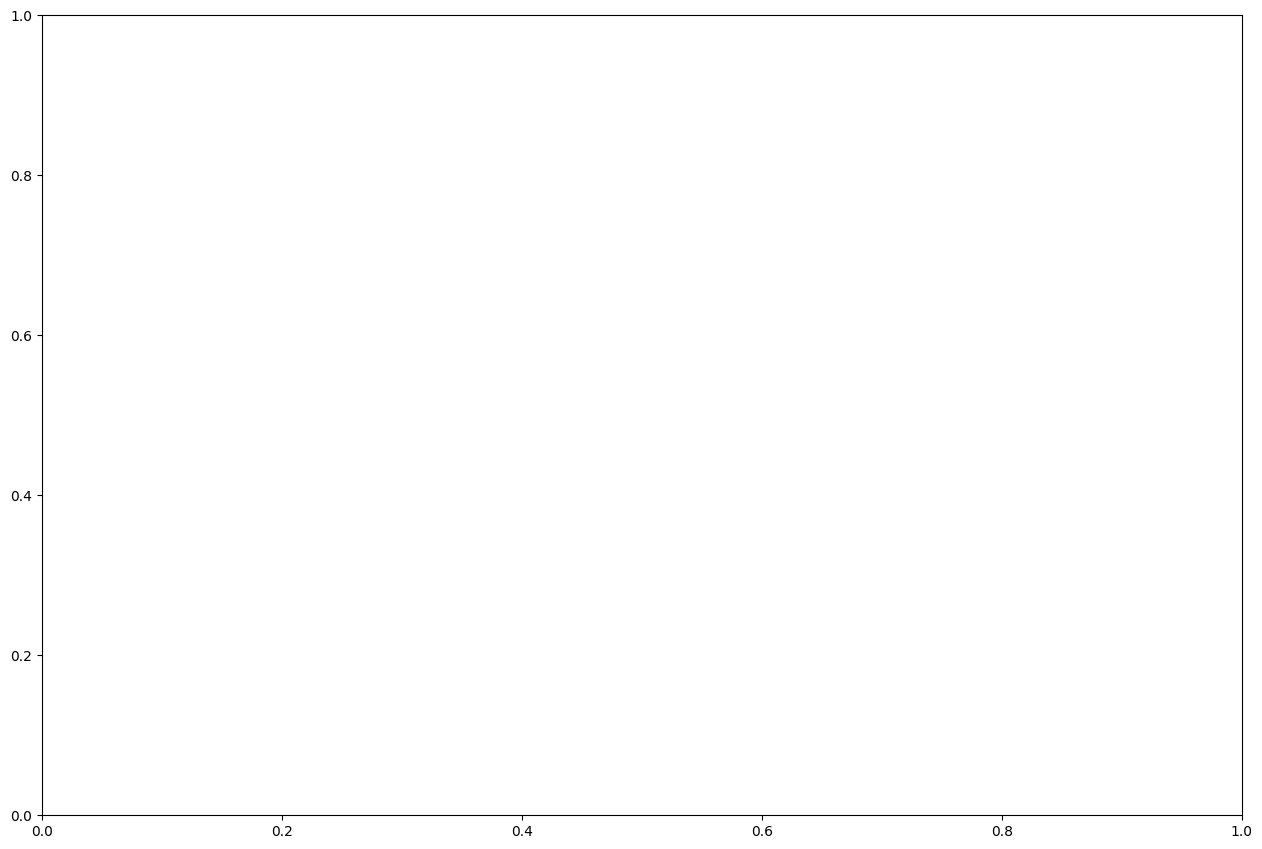

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10)
plt.title('Grafo delle Opere d\'Arte del Museo del Prado')
plt.show()

In [ ]:
import numpy as np
def pagerank(M, num_iterations=100, d=0.85, tol=1.0e-6):
    """
    Compute the PageRank of each node in the graph.

    Parameters:
    M (numpy array): Adjacency matrix where M[i][j] represents a link from node j to node i.
    num_iterations (int): Maximum number of iterations to run the algorithm.
    d (float): Damping factor, usually set to 0.85.
    tol (float): Tolerance for convergence.

    Returns:
    numpy array: PageRank vector
    """
    N = M.shape[1]  # Number of nodes in the graph
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)  # Normalize initial vector
    M_hat = d * M + (1 - d) / N * np.ones((N, N))

    for _ in range(num_iterations):
        v_new = M_hat @ v
        if np.linalg.norm(v_new - v, 1) < tol:
            break
        v = v_new

    return v


In [ ]:
# Example usage:
if __name__ == "__main__":
    # Example adjacency matrix (4 nodes)
    M = np.array([[0, 0, 1, 0],
                  [1, 0, 0, 1],
                  [0, 1, 0, 0],
                  [0, 0, 0, 0]], dtype=float)

    # Normalize columns to create stochastic matrix
    M = M / np.sum(M, axis=0)

    pagerank_values = pagerank(M)
    print("PageRank values:")
    print(pagerank_values)

In [ ]:
adjacency_matrix = nx.to_numpy_array(G, dtype=float)

# Normalize the columns to create a stochastic matrix
column_sums = np.sum(adjacency_matrix, axis=0)
column_sums[column_sums == 0] = 1  #Avoid division by zero for nodes without outgoing edges
adjacency_matrix = adjacency_matrix / column_sums

print("normalized adjacency matrix:")
print(adjacency_matrix)

normalized adjacency matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
pagerank(adjacency_matrix)

array([[3.47549186e-09],
       [3.47549186e-09],
       [3.47549186e-09],
       ...,
       [4.96532701e-08],
       [3.47549186e-09],
       [4.29115214e-08]])

In [ ]:
ranks = pagerank(adjacency_matrix)

In [ ]:
print(ranks)

[[3.47324139e-09]
 [3.47324139e-09]
 [3.47324139e-09]
 ...
 [4.96209335e-08]
 [3.47324139e-09]
 [4.28835432e-08]]


In [ ]:
ranks_flat = ranks.flatten()
top_10_indices = np.argsort(ranks_flat)[-10:]
print("The 10 highest PageRank values are:")
for index in top_10_indices:
    print(f"Value: {ranks_flat[index]:.10f}, Index: {index}")

The 10 highest PageRank values are:
Value: 0.0000000798, Index: 1892
Value: 0.0000000800, Index: 3663
Value: 0.0000000804, Index: 1630
Value: 0.0000000804, Index: 93
Value: 0.0000000808, Index: 8699
Value: 0.0000000836, Index: 573
Value: 0.0000000836, Index: 7430
Value: 0.0000000863, Index: 10811
Value: 0.0000000863, Index: 5052
Value: 0.0000000891, Index: 2969


In [ ]:
#Here’s an example of how I could modify the PageRank function to support large, sparse matrices
import numpy as np
from scipy.sparse import csr_matrix

def pagerank2(M, num_iterations=100, d=0.85, tol=1.0e-6):
    """
    Compute the PageRank of each node in the graph.

    Parameters:
    M (numpy array or scipy sparse matrix): Adjacency matrix where M[i][j] represents a link from node j to node i.
    num_iterations (int): Maximum number of iterations to run the algorithm.
    d (float): Damping factor, usually set to 0.85.
    tol (float): Tolerance for convergence.

    Returns:
    numpy array: PageRank vector
    """
    if not isinstance(M, csr_matrix):
        M = csr_matrix(M)

    N = M.shape[1]  # Number of nodes in the graph
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)  # Normalize initial vector
    M_hat = d * M + (1 - d) / N * np.ones((N, N))

    for _ in range(num_iterations):
        v_new = M_hat @ v
        if np.linalg.norm(v_new - v, 1) < tol:
            break
        v = v_new

    return v

In [ ]:
pagerank2(adjacency_matrix)

matrix([[3.49593193e-09],
        [3.49593193e-09],
        [3.49593193e-09],
        ...,
        [4.99452050e-08],
        [3.49593193e-09],
        [4.31637561e-08]])

In [ ]:
pagerank_scores3 = nx.pagerank(G)
pagerank_df = pd.DataFrame(pagerank_scores3.items(), columns=['work_url', 'pagerank_score'])
df_ranked = df.merge(pagerank_df, on='work_url')

# Sort by PageRank scores
df_ranked = df_ranked.sort_values(by='pagerank_score', ascending=False)

In [ ]:
print(df_ranked[['work_url', 'pagerank_score']].head(15))

                                                work_url  pagerank_score
2969   https://www.museodelprado.es/coleccion/obra-de...        0.000280
5052   https://www.museodelprado.es/coleccion/obra-de...        0.000255
10811  https://www.museodelprado.es/coleccion/obra-de...        0.000255
573    https://www.museodelprado.es/coleccion/obra-de...        0.000254
7430   https://www.museodelprado.es/coleccion/obra-de...        0.000254
2563   https://www.museodelprado.es/coleccion/obra-de...        0.000253
93     https://www.museodelprado.es/coleccion/obra-de...        0.000249
1630   https://www.museodelprado.es/coleccion/obra-de...        0.000249
1892   https://www.museodelprado.es/coleccion/obra-de...        0.000247
8699   https://www.museodelprado.es/coleccion/obra-de...        0.000247
3663   https://www.museodelprado.es/coleccion/obra-de...        0.000244
3786   https://www.museodelprado.es/coleccion/obra-de...        0.000243
11901  https://www.museodelprado.es/coleccion/obra-